In [1]:
from __future__ import print_function, division
import sys,os
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
from quspin.basis import spinless_fermion_basis_1d # fermion basis for comparison
import numpy as np # generic math functions
import matplotlib.pyplot as plt
import itertools
plt.rcParams['figure.figsize'] = [10, 8] # changes default figure size in jupyter notebook

## Coupling and option initialization

In [2]:
N=9 # number of sites (NOT STAGGERED SITES!!)
Pinit=1 # P_{-1}
g = -1 # E-field coupling constant
t = -1 # coupling constant for hopping term
m = -1 # mass

half_filling = 1 # options: 1 for half filling, 0 for not half-filling
single_filling = 0 # options: 1 for single-filling, 0 else

PBC = 1 # options: 1 for periodic boundary conditions, 0 for fixed

if(N % 4 < 2): # Checks if N is even for anti- or periodic boundary conditions
    Neven = 1
else:
    Neven = 0

In [3]:
def arrayn(n): ## returns an array of length n with values 0,...,n-1
    return([i for i in range(n)])

if(half_filling): # sets filling to N//2 if half filling is turned on, else it does not specify
    basis1 = spin_basis_1d(N,pauli=-1,Nup=N//2)
elif(single_filling):
    basis1 = spin_basis_1d(N,pauli=-1,Nup=1)
else:
    basis1 = spin_basis_1d(N,pauli=-1)

In [4]:
###### Hopping terms
if(PBC):
    
    if(Neven and half_filling): # Anti-Periodic
        J12 = [[-t,i,(i+1)%N] for i in range(N-1)] # The final boundary term must be added with negative coupling
        J13 = [[-t,(i+1)%N,i] for i in range(N-1)] 
        J12.append([t,N-1,0]) # The negatively-coupled (anti-periodic) final boundary terms
        J13.append([t,0,N-1])
    
    else: # Periodic 
        J12 = [[-t,i,(i+1)%N] for i in range(N)] # the %N and range increased by 1 adds the final boundary term making it periodic
        J13=[[-t,(i+1)%N,i] for i in range(N)]
    
else: # Fixed boundary conditions
    J12 = [[-t,i,i+1] for i in range(N-1)] # we need to append "+-" for signs of sigmas
    J13=[[-t,i+1,i] for i in range(N-1)] # append "+-" for signs of sigmas, i+1,i since this is h.c. term

###### mass term (unchanged by PBC)
J14 = [[m*(-1.0)**i,i,i] for i in range(N)] # append  "+-" for signs of sigmas

In [5]:
staticpart1=[["+-",J14],["+-",J12],["+-",J13]] # Defining static and dynamic parts of H and filling with hopping and mass terms
dynamicpart1=[]

In [6]:
###### E-field interaction term

zstring = "z"
def upperindices(n): # Creating a function to make the right length string of "z"
    a = ""
    for i in range(n):
        a = a + zstring
    return(a)

def summandJ1(n): # Creating a function to generate coupling lists for the E-field product term
    indices=[i for i in range(n+1)]
    indices.insert(0,-Pinit*g*(-1.0)**(n*(n+1.0)*.5)*(-1.0)**(n+1.0))
    indices=[upperindices(n+1),[indices]]
    return(indices)

for i in range(0,N): # Piecemeal inserting the E-field product term into the hamiltonian
        staticpart1.insert(0,summandJ1(int(i)))

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Static couplings spin: [['zzzzzzzzz', [[-1.0, 0, 1, 2, 3, 4, 5, 6, 7, 8]]], ['zzzzzzzz', [[1.0, 0, 1, 2, 3, 4, 5, 6, 7]]], ['zzzzzzz', [[1.0, 0, 1, 2, 3, 4, 5, 6]]], ['zzzzzz', [[-1.0, 0, 1, 2, 3, 4, 5]]], ['zzzzz', [[-1.0, 0, 1, 2, 3, 4]]], ['zzzz', [[1.0, 0, 1, 2, 3]]], ['zzz', [[1.0, 0, 1, 2]]], ['zz', [[-1.0, 0, 1]]], ['z', [[-1.0, 0]]], ['+-', [[-1.0, 0, 0], [1.0, 1, 1], [-1.0, 2, 2], [1.0, 3, 3], [-1.0, 4, 4], [1.0, 5, 5], [-1.0, 6, 6], [1.0, 7, 7], [-1.0, 8, 8]]], ['+-', [[1, 0, 1], [1, 1, 2], [1, 2, 3], [1, 3, 4], [1, 4, 5], [1, 5, 6], [1, 6, 7], [1, 7, 8], [-1, 8, 0]]], ['+-', [[1, 1, 0], [1, 2, 1], [1, 3, 2], [1, 4, 3], [1, 5, 4], [1, 6, 5], [1, 7, 6], [1, 8, 7], [-1, 0, 8]]]]
# of eigenvalues: 126


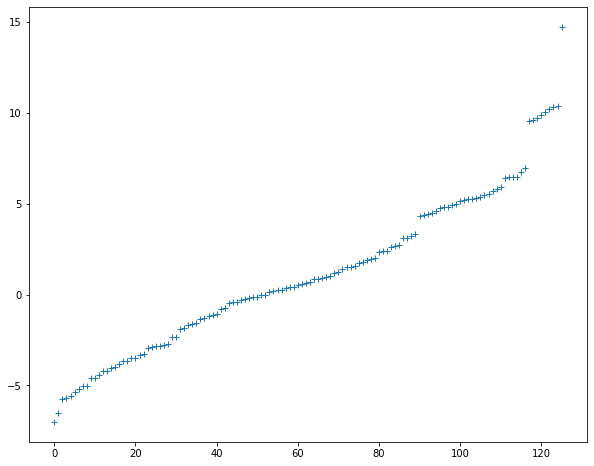

In [7]:
H1 = hamiltonian(staticpart1,dynamicpart1,basis=basis1,dtype=np.float64) # Creating the hamiltonian with proper basis

eigenvalues1 = H1.eigvalsh() # Getting and plotting eigenvalues
plt.plot(eigenvalues1,'+')

print("Static couplings spin:", staticpart1)

print("# of eigenvalues: " + str(len(eigenvalues1))) # Printing number of eigenvalues for comparison
#x=np.linspace(0,50,500)
#plt.plot(x,np.sqrt(1+np.sin(2*np.pi*(x-25.0)/100.0)**2))

Note: Disagrees with Niklas's code for PBC = 1 and N is EVEN

## Do it again with Fermion basis to test

In [8]:
# Define basis
if(half_filling): # sets filling to N//2 if half filling is turned on, else it does not specify
    basis = spinless_fermion_basis_1d (L=N,Nf=N//2)
elif(single_filling):
    basis = spinless_fermion_basis_1d (L=N,Nf=1)
else:
    basis = spinless_fermion_basis_1d (L=N)

###### Hopping terms
if(PBC):
    
    J2 = [[-t,i,(i+1)%N] for i in range(N)] # fermionic basis in quspin gets rid of need for manual anti-periodicity adjustment
    J3=[[-t,(i+1)%N,i] for i in range(N)]
    
else: # Fixed boundary conditions
    J2 = [[-t,i,i+1] for i in range(N-1)] # we need to append "+-" for daggers of psis
    J3=[[-t,i+1,i] for i in range(N-1)] # append "+-" for daggers of psis, i+1,i since this is h.c. term

###### mass term (unchanged by PBC)
J4 = [[m*(-1.0)**i,i,i] for i in range(N)] # append  "+-" for daggers of psis

In [9]:
staticpart=[["+-",J4],["+-",J2],["+-",J3]] # Defining static and dynamic parts of H and filling with hopping and mass terms
dynamicpart=[]

In [10]:
###### E-field interaction term

zstring = "z"
def upperindices(n): # Creating a function to make the right length string of "z"
    a = ""
    for i in range(n):
        a = a + zstring
    return(a)

def summandJ(n): # Creating a function to generate coupling lists for the E-field product term
    indices=[i for i in range(n+1)]
    indices.insert(0,-Pinit*g*(-1.0)**(n*(n+1.0)*.5)*(-2.0)**(n+1.0)) # The extra -2^n is due to the fermion basis "z" defn.
    indices=[upperindices(n+1),[indices]]
    return(indices)

for i in range(N): # Piecemeal inserting the E-field product term into the hamiltonian
        staticpart.insert(0,summandJ(int(i)))

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Static couplings fermion: [['zzzzzzzzz', [[-512.0, 0, 1, 2, 3, 4, 5, 6, 7, 8]]], ['zzzzzzzz', [[256.0, 0, 1, 2, 3, 4, 5, 6, 7]]], ['zzzzzzz', [[128.0, 0, 1, 2, 3, 4, 5, 6]]], ['zzzzzz', [[-64.0, 0, 1, 2, 3, 4, 5]]], ['zzzzz', [[-32.0, 0, 1, 2, 3, 4]]], ['zzzz', [[16.0, 0, 1, 2, 3]]], ['zzz', [[8.0, 0, 1, 2]]], ['zz', [[-4.0, 0, 1]]], ['z', [[-2.0, 0]]], ['+-', [[-1.0, 0, 0], [1.0, 1, 1], [-1.0, 2, 2], [1.0, 3, 3], [-1.0, 4, 4], [1.0, 5, 5], [-1.0, 6, 6], [1.0, 7, 7], [-1.0, 8, 8]]], ['+-', [[1, 0, 1], [1, 1, 2], [1, 2, 3], [1, 3, 4], [1, 4, 5], [1, 5, 6], [1, 6, 7], [1, 7, 8], [1, 8, 0]]], ['+-', [[1, 1, 0], [1, 2, 1], [1, 3, 2], [1, 4, 3], [1, 5, 4], [1, 6, 5], [1, 7, 6], [1, 8, 7], [1, 0, 8]]]]
# of eigenvalues: 126


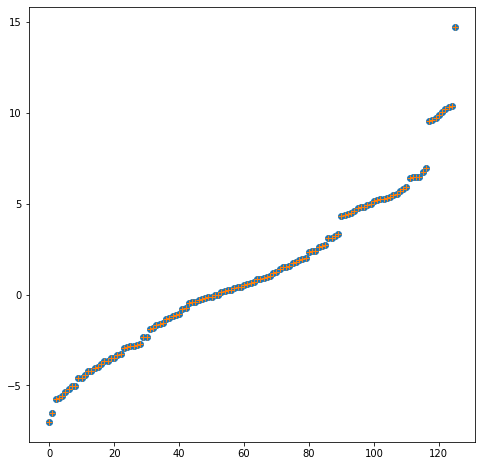

In [11]:
H = hamiltonian(staticpart,dynamicpart,basis=basis,dtype=np.float64) # Creating the hamiltonian with proper basis

eigenvalues = H.eigvalsh() # Getting and plotting eigenvalues0
f = plt.figure(figsize=(8,8))

print("Static couplings fermion:", staticpart)

ax = plt.subplot(111)

ax.plot(eigenvalues,'o')
ax.plot(eigenvalues1,'+')


print("# of eigenvalues: " + str(len(eigenvalues))) # Printing number of eigenvalues for comparison

Note: Agreeing! :) 

In [12]:
print("Eigenvalues:\n", eigenvalues1)

Eigenvalues:
 [-7.01175007 -6.50796437 -5.73928995 -5.71459181 -5.58956652 -5.35343452
 -5.20581409 -5.02165198 -5.00993059 -4.57552776 -4.56861591 -4.4186677
 -4.22837776 -4.18796766 -4.01526748 -4.00928631 -3.81055236 -3.63520037
 -3.6289627  -3.51304175 -3.47343767 -3.29476521 -3.25293132 -2.91285077
 -2.89798022 -2.83603005 -2.80868337 -2.79302991 -2.70448174 -2.35819457
 -2.30796328 -1.90259715 -1.86148716 -1.68116858 -1.61294061 -1.58514196
 -1.35134814 -1.29255824 -1.18476959 -1.11389113 -1.08819177 -0.78902548
 -0.71873049 -0.47485087 -0.40584143 -0.39543008 -0.3160145  -0.22915755
 -0.16259936 -0.10934909 -0.10367208 -0.03383867 -0.02860891  0.13606397
  0.1861177   0.23721733  0.28056707  0.37427716  0.41916802  0.4338253
  0.5245327   0.57083627  0.64367365  0.69881962  0.83601924  0.88206869
  0.93892168  0.97179329  1.04662838  1.17228234  1.23536486  1.41874667
  1.50510572  1.5231034   1.57552666  1.7483688   1.77658452  1.88671206
  1.97975464  2.01088173  2.35597415  2